In [14]:
import pandas as pd

metadata = pd.read_csv(
    r'C:\Users\14217\Desktop\DT2470\mtg-jamendo-dataset\data\autotagging_moodtheme.tsv', 
    sep='\t',
    on_bad_lines='skip',
    quoting=3
)

print("Data shape:", metadata.shape)
print("\nColumn names:", metadata.columns.tolist())
print("\nFirst 5 rows:")
print(metadata.head())

Data shape: (9947, 6)

Column names: ['TRACK_ID', 'ARTIST_ID', 'ALBUM_ID', 'PATH', 'DURATION', 'TAGS']

First 5 rows:
        TRACK_ID      ARTIST_ID      ALBUM_ID         PATH  DURATION  \
0  track_0000948  artist_000087  album_000149   48/948.mp3     212.7   
1  track_0000950  artist_000087  album_000149   50/950.mp3     248.0   
2  track_0000951  artist_000087  album_000149   51/951.mp3     199.7   
3  track_0002165  artist_000326  album_000347  65/2165.mp3     229.0   
4  track_0002263  artist_000320  album_000366  63/2263.mp3     494.7   

                       TAGS  
0   mood/theme---background  
1   mood/theme---background  
2   mood/theme---background  
3         mood/theme---film  
4  mood/theme---melancholic  


In [15]:
import librosa
import os

sample_file = r"C:\Users\14217\Desktop\DT2470\mtg-jamendo-download\02\21502.low.mp3"
try:
    duration = librosa.get_duration(filename=sample_file)
    print(f"Audio duration: {duration:.2f} seconds")
except Exception as e:
    print(f"Error: {e}")
    print("File may not exist or path is incorrect")

Audio duration: 105.90 seconds


C:\Users\14217\AppData\Local\Temp\ipykernel_1688\1162304711.py:6: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=sample_file)


In [16]:
import os

download_dir = r"C:\Users\14217\Desktop\DT2470\mtg-jamendo-download"
print("Download directory contents:")
for item in os.listdir(download_dir):
    item_path = os.path.join(download_dir, item)
    if os.path.isdir(item_path):
        print(f"📁 {item}")
        for subitem in os.listdir(item_path)[:5]:
            print(f"  └── {subitem}")
    else:
        print(f"📄 {item}")

print("\nSearching for MP3 files...")
mp3_files = []
for root, dirs, files in os.walk(download_dir):
    for file in files:
        if file.endswith('.mp3'):
            mp3_files.append(os.path.join(root, file))
            if len(mp3_files) >= 5:
                break
    if mp3_files:
        break

print("Found MP3 file examples:")
for mp3_file in mp3_files:
    print(f"🎵 {mp3_file}")
    file_size = os.path.getsize(mp3_file) / 1024 / 1024
    print(f"   Size: {file_size:.2f} MB")

Download directory contents:
📁 00
  └── 1009600.low.mp3
  └── 1012000.low.mp3
  └── 1014400.low.mp3
  └── 1028900.low.mp3
  └── 1032700.low.mp3
📁 01
  └── 1009601.low.mp3
  └── 1009701.low.mp3
  └── 1012001.low.mp3
  └── 1018801.low.mp3
  └── 1028901.low.mp3
📁 02
  └── 1012002.low.mp3
  └── 1028902.low.mp3
  └── 1029002.low.mp3
  └── 1030102.low.mp3
  └── 1032702.low.mp3
📁 03
  └── 100603.low.mp3
  └── 1012003.low.mp3
  └── 1028503.low.mp3
  └── 1028903.low.mp3
  └── 1036003.low.mp3
📁 04
  └── 1009604.low.mp3
  └── 1012004.low.mp3
  └── 1028504.low.mp3
  └── 1028904.low.mp3
  └── 1041104.low.mp3
📁 05
  └── 1012005.low.mp3
  └── 1023305.low.mp3
  └── 1024405.low.mp3
  └── 1027705.low.mp3
  └── 1028505.low.mp3
📁 06
  └── 1023306.low.mp3
  └── 1027906.low.mp3
  └── 1028506.low.mp3
  └── 1028906.low.mp3
  └── 1031106.low.mp3
📁 07
  └── 1001307.low.mp3
  └── 1012007.low.mp3
  └── 1027507.low.mp3
  └── 1027907.low.mp3
  └── 1028507.low.mp3
📁 08
  └── 1001308.low.mp3
  └── 1010008.low.mp3
  └

Complete Emotion Tag Statistics
Total tracks: 9947
Unique tags: 59
Total tag occurrences: 9947
Average tags per track: 1.00

Tag distribution details:
------------------------------------------------------------
  1. melodic             :  688 tracks (  6.9%)
  2. energetic           :  601 tracks (  6.0%)
  3. dark                :  588 tracks (  5.9%)
  4. film                :  552 tracks (  5.5%)
  5. relaxing            :  482 tracks (  4.8%)
  6. dream               :  418 tracks (  4.2%)
  7. ambiental           :  394 tracks (  4.0%)
  8. love                :  366 tracks (  3.7%)
  9. soundscape          :  311 tracks (  3.1%)
 10. emotional           :  307 tracks (  3.1%)
 11. sad                 :  303 tracks (  3.0%)
 12. christmas           :  275 tracks (  2.8%)
 13. happy               :  248 tracks (  2.5%)
 14. deep                :  242 tracks (  2.4%)
 15. epic                :  239 tracks (  2.4%)
 16. space               :  226 tracks (  2.3%)
 17. meditative     

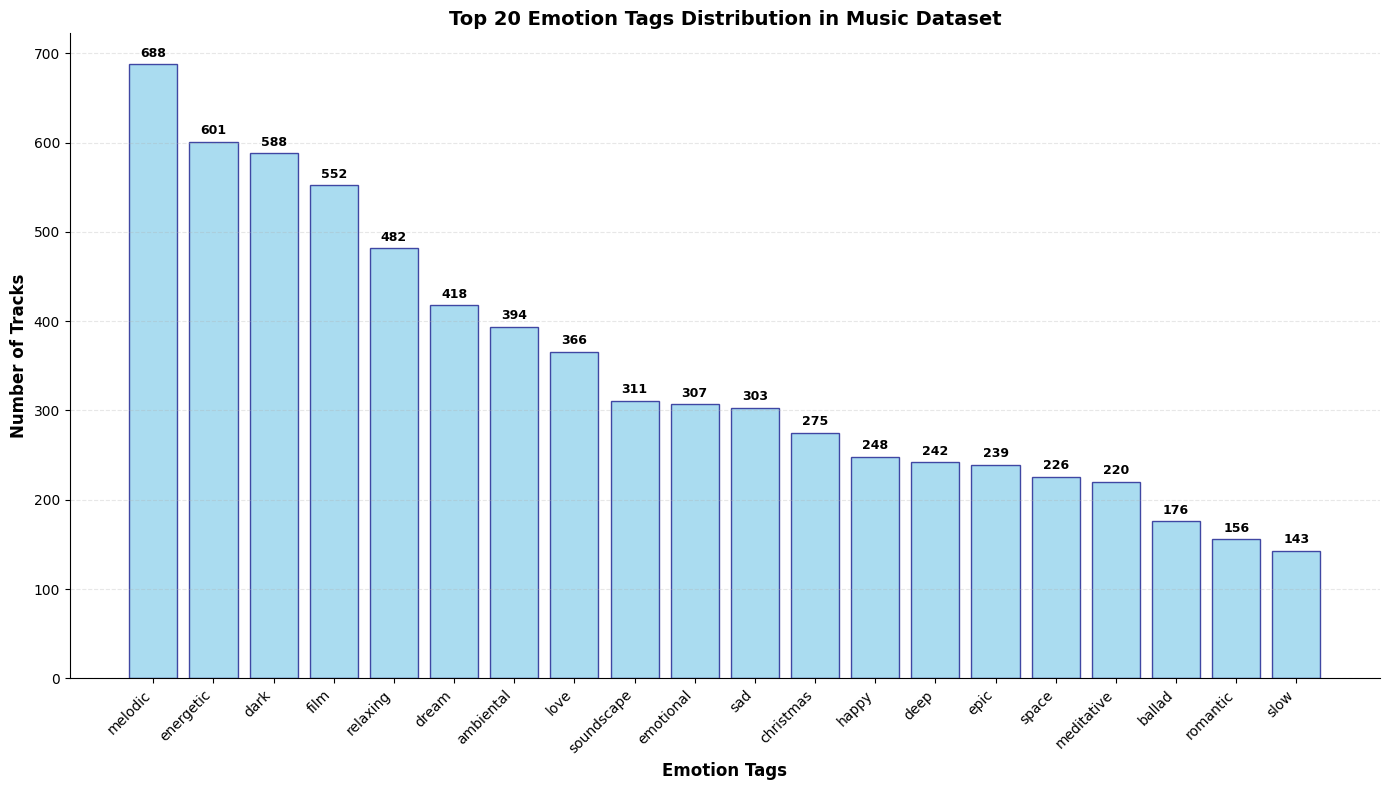

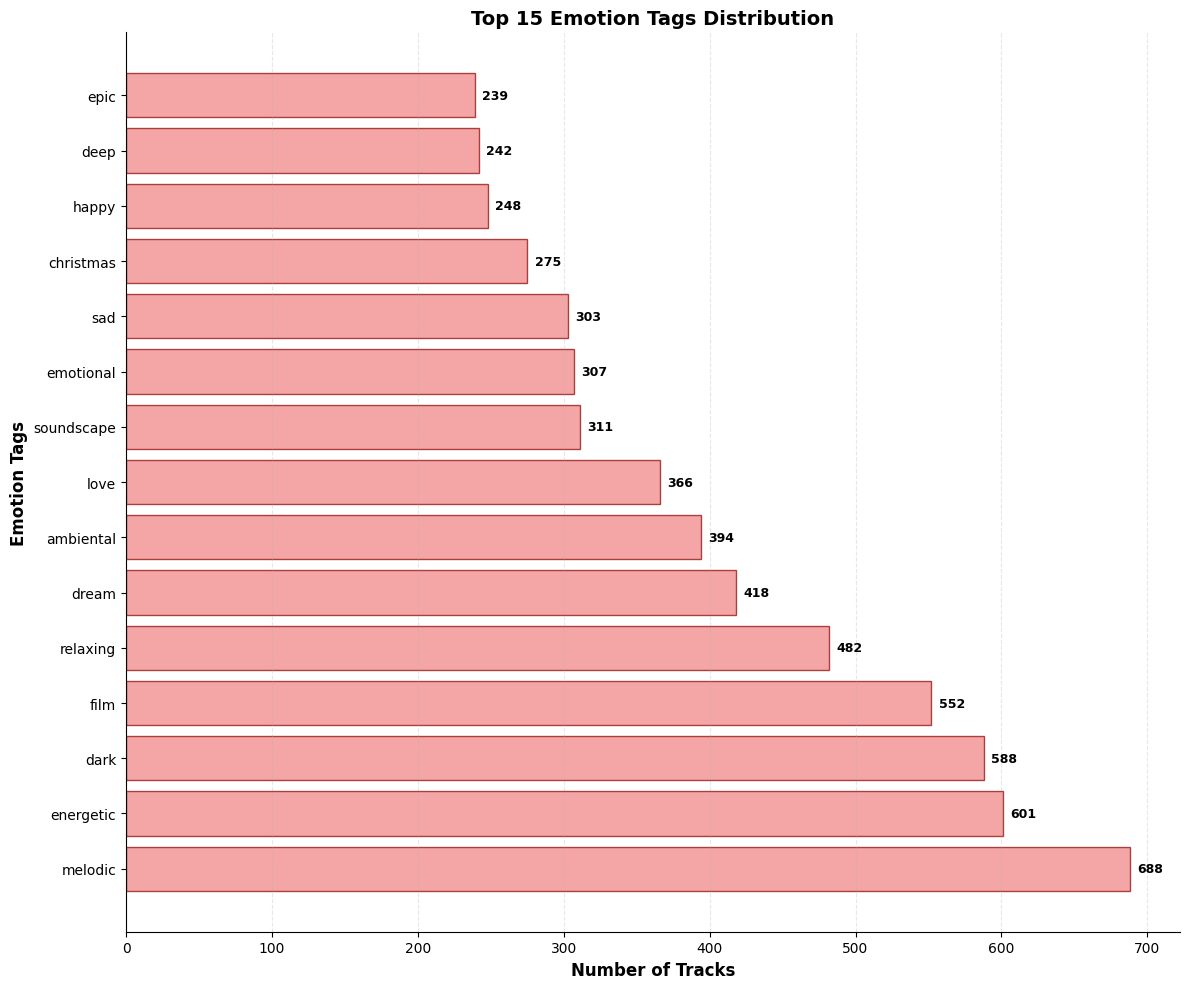

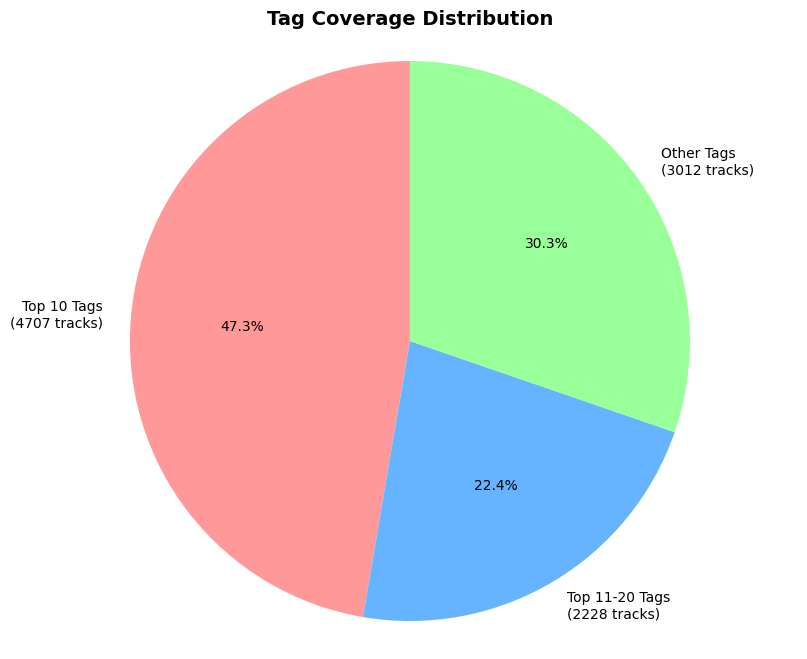

In [22]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import os

def analyze_all_tags(metadata_file):
    """
    Analyze the distribution of all emotion tags
    """
    # Read metadata
    try:
        metadata = pd.read_csv(metadata_file, sep='\t', on_bad_lines='skip', quoting=3)
    except Exception as e:
        print(f"Error reading file: {e}")
        return None, None, None
    
    # Extract all tags
    all_tags = []
    for tags_str in metadata['TAGS']:
        if pd.isna(tags_str):
            continue
        tags = str(tags_str).split('\t')  # Use tab as separator for multiple tags
        # Keep only mood/theme tags and clean them
        for tag in tags:
            if tag.startswith('mood/theme---'):
                clean_tag = tag.replace('mood/theme---', '')
                all_tags.append(clean_tag)
    
    # Count tag frequencies
    tag_counter = Counter(all_tags)
    
    # Sort by frequency
    sorted_tags = tag_counter.most_common()
    
    # Print statistical results
    print("=" * 60)
    print("Complete Emotion Tag Statistics")
    print("=" * 60)
    print(f"Total tracks: {len(metadata)}")
    print(f"Unique tags: {len(sorted_tags)}")
    print(f"Total tag occurrences: {len(all_tags)}")
    print(f"Average tags per track: {len(all_tags)/len(metadata):.2f}")
    print("\nTag distribution details:")
    print("-" * 60)
    
    for i, (tag, count) in enumerate(sorted_tags, 1):
        percentage = (count / len(metadata)) * 100
        print(f"{i:3d}. {tag:<20}: {count:>4} tracks ({percentage:5.1f}%)")
    
    # Statistical summary
    print("\nStatistical Summary:")
    print("-" * 60)
    print(f"Top 10 tags cover: {sum(count for tag, count in sorted_tags[:10])} tracks")
    print(f"Top 10 tags coverage: {sum(count for tag, count in sorted_tags[:10])/len(metadata)*100:.1f}%")
    print(f"Top 20 tags cover: {sum(count for tag, count in sorted_tags[:20])} tracks")
    print(f"Top 20 tags coverage: {sum(count for tag, count in sorted_tags[:20])/len(metadata)*100:.1f}%")
    
    return sorted_tags, all_tags, metadata

def plot_tag_distribution(sorted_tags, top_n=20):
    """
    Plot tag distribution in English
    """
    plt.figure(figsize=(14, 8))
    
    # Take top_n tags
    top_tags = sorted_tags[:top_n]
    tags, counts = zip(*top_tags)
    
    # Create bar chart
    bars = plt.bar(range(len(tags)), counts, color='skyblue', edgecolor='navy', alpha=0.7)
    plt.xlabel('Emotion Tags', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Tracks', fontsize=12, fontweight='bold')
    plt.title(f'Top {top_n} Emotion Tags Distribution in Music Dataset', fontsize=14, fontweight='bold')
    plt.xticks(range(len(tags)), tags, rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Display numbers on bars
    for i, (bar, count) in enumerate(zip(bars, counts)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{count}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Add some styling
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_tag_distribution_horizontal(sorted_tags, top_n=20):
    """
    Plot tag distribution horizontally (alternative view)
    """
    plt.figure(figsize=(12, 10))
    
    # Take top_n tags
    top_tags = sorted_tags[:top_n]
    tags, counts = zip(*top_tags)
    
    # Create horizontal bar chart
    y_pos = np.arange(len(tags))
    bars = plt.barh(y_pos, counts, color='lightcoral', edgecolor='darkred', alpha=0.7)
    
    plt.ylabel('Emotion Tags', fontsize=12, fontweight='bold')
    plt.xlabel('Number of Tracks', fontsize=12, fontweight='bold')
    plt.title(f'Top {top_n} Emotion Tags Distribution', fontsize=14, fontweight='bold')
    plt.yticks(y_pos, tags, fontsize=10)
    plt.xticks(fontsize=10)
    
    # Add grid
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Display numbers on bars
    for i, (bar, count) in enumerate(zip(bars, counts)):
        width = bar.get_width()
        plt.text(width + 5, bar.get_y() + bar.get_height()/2.,
                f'{count}', ha='left', va='center', fontsize=9, fontweight='bold')
    
    # Remove spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_coverage_pie_chart(sorted_tags, metadata):
    """
    Plot coverage pie chart for top tags
    """
    top_10_coverage = sum(count for tag, count in sorted_tags[:10])
    top_20_coverage = sum(count for tag, count in sorted_tags[:20]) - top_10_coverage
    other_coverage = len(metadata) - top_20_coverage - top_10_coverage
    
    sizes = [top_10_coverage, top_20_coverage, other_coverage]
    labels = [f'Top 10 Tags\n({top_10_coverage} tracks)', 
              f'Top 11-20 Tags\n({top_20_coverage} tracks)', 
              f'Other Tags\n({other_coverage} tracks)']
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    
    plt.figure(figsize=(10, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Tag Coverage Distribution', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.show()

# Main program
if __name__ == "__main__":
    # Metadata file path
    metadata_file = r"C:\Users\14217\Desktop\DT2470\mtg-jamendo-dataset\data\autotagging_moodtheme.tsv"
    
    # Analyze tags
    sorted_tags, all_tags, metadata = analyze_all_tags(metadata_file)
    
    if sorted_tags is None:
        print("Analysis failed, please check file path and format")
    else:
        # Save statistical results to file
        with open(r"C:\Users\14217\Desktop\DT2470\Predictions with sound classifier\tag_statistics_english.txt", 'w', encoding='utf-8') as f:
            f.write("Emotion Tag Statistics Report\n")
            f.write("=" * 50 + "\n")
            f.write(f"Total tracks: {len(metadata)}\n")
            f.write(f"Unique tags: {len(sorted_tags)}\n")
            f.write(f"Total tag occurrences: {len(all_tags)}\n")
            f.write(f"Average tags per track: {len(all_tags)/len(metadata):.2f}\n\n")
            
            f.write("Tag Distribution Details:\n")
            f.write("-" * 50 + "\n")
            for i, (tag, count) in enumerate(sorted_tags, 1):
                percentage = (count / len(metadata)) * 100
                f.write(f"{i:3d}. {tag:<20}: {count:>4} tracks ({percentage:5.1f}%)\n")
        
        print(f"\nStatistics report saved to: C:\\Users\\14217\\Desktop\\DT2470\\Predictions with sound classifier\\tag_statistics_english.txt")
        
        # Generate training configuration suggestions
        print("\n" + "=" * 60)
        print("Training Configuration Suggestions")
        print("=" * 60)
        
        # Based on statistical results
        top_10_coverage = sum(count for tag, count in sorted_tags[:10]) / len(metadata) * 100
        top_20_coverage = sum(count for tag, count in sorted_tags[:20]) / len(metadata) * 100
        
        print(f"Recommended approaches:")
        if top_10_coverage > 45:
            print(f"✅ Top 10 tags approach: Covers {top_10_coverage:.1f}% of data")
            print(f"   Output dimensions: 10 | Data volume: {sum(count for tag, count in sorted_tags[:10])} tracks")
        
        if top_20_coverage > 70:
            print(f"✅ Top 20 tags approach: Covers {top_20_coverage:.1f}% of data") 
            print(f"   Output dimensions: 20 | Data volume: {sum(count for tag, count in sorted_tags[:20])} tracks")
        
        print(f"📊 Full tags approach: Covers 100% of data")
        print(f"   Output dimensions: {len(sorted_tags)} | Data volume: {len(metadata)} tracks")
        
        # Plot distributions
        try:
            print("\nGenerating visualizations...")
            plot_tag_distribution(sorted_tags, top_n=20)
            plot_tag_distribution_horizontal(sorted_tags, top_n=15)
            plot_coverage_pie_chart(sorted_tags, metadata)
        except Exception as e:
            print(f"Visualization error: {e}")
            print("Statistical information has been generated successfully")

In [15]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import soundfile as sf
import random
import math

def preprocess_audio_to_10s_multisegment(metadata_file, input_base_dir, output_base_dir, sr=22050, target_per_class=2000):
    """
    从前10个情绪类别中抽取音频：
    - 每类随机截取多个10s片段，直到总数达到 target_per_class
    - 每个片段保存为单独文件
    - 输出新的 metadata 文件
    """
    # 读取元数据
    metadata = pd.read_csv(metadata_file, sep='\t', on_bad_lines='skip', quoting=3)

    # 确认标签列名称
    tag_col = None
    for col in metadata.columns:
        if 'tag' in col.lower() or 'mood' in col.lower():
            tag_col = col
            break
    if tag_col is None:
        raise ValueError("❌ 未找到情绪类别字段（应包含 'TAG' 或 'MOOD'）")

    # 获取前10个标签
    top10_tags = metadata[tag_col].value_counts().nlargest(10).index.tolist()
    metadata_top10 = metadata[metadata[tag_col].isin(top10_tags)]
    print(f"🎯 选取前10个情绪类别: {top10_tags}")

    target_duration = 10  # 秒
    target_samples = target_duration * sr
    processed_count, error_count = 0, 0
    new_metadata_rows = []

    print(f"开始处理，每类目标 {target_per_class} 条，共 {len(top10_tags)} 类...")

    # 逐类处理
    for tag in top10_tags:
        subset = metadata_top10[metadata_top10[tag_col] == tag]
        subset = subset.reset_index(drop=True)
        total_files = len(subset)

        print(f"\n🎵 处理类别: {tag} ({total_files} 条原始音频)")

        if total_files == 0:
            continue

        # 计算每个音频要生成的片段数
        segments_per_audio = math.ceil(target_per_class / total_files)

        count_this_class = 0
        for idx, row in tqdm(subset.iterrows(), total=len(subset)):
            try:
                path_in_metadata = row['PATH']
                track_id_full = row['TRACK_ID']
                numeric_id = track_id_full.replace('track_', '')
                dir_from_metadata = os.path.dirname(path_in_metadata)

                # 尝试匹配文件名
                possible_filenames = [
                    f"{numeric_id}.low.mp3",
                    f"{numeric_id.lstrip('0')}.low.mp3",
                    f"1{numeric_id}.low.mp3",
                ]

                input_path = None
                for filename in possible_filenames:
                    possible_path = os.path.join(input_base_dir, dir_from_metadata, filename)
                    if os.path.exists(possible_path):
                        input_path = possible_path
                        break

                if input_path is None:
                    for root, _, files in os.walk(os.path.join(input_base_dir, dir_from_metadata)):
                        for file in files:
                            if file.endswith('.low.mp3') and numeric_id in file:
                                input_path = os.path.join(root, file)
                                break
                        if input_path:
                            break

                if input_path is None:
                    error_count += 1
                    continue

                # 加载音频
                audio, _ = librosa.load(input_path, sr=sr)
                if len(audio) < sr * 2:
                    continue  # 太短就跳过

                # 输出目录
                output_dir = os.path.join(output_base_dir, "balanced_10s_multi", tag)
                os.makedirs(output_dir, exist_ok=True)

                # 为当前音频生成多个10秒片段
                for seg_idx in range(segments_per_audio):
                    if count_this_class >= target_per_class:
                        break  # 达标即停

                    if len(audio) > target_samples:
                        start = random.randint(0, len(audio) - target_samples)
                        audio_10s = audio[start:start + target_samples]
                    else:
                        repeats = int(np.ceil(target_samples / len(audio)))
                        audio_10s = np.tile(audio, repeats)[:target_samples]

                    output_filename = f"{os.path.splitext(os.path.basename(path_in_metadata))[0]}_{seg_idx}_10s.wav"
                    output_path = os.path.join(output_dir, output_filename)
                    sf.write(output_path, audio_10s, sr)

                    # 记录 metadata
                    new_metadata_rows.append({
                        'TRACK_ID': track_id_full,
                        'TAG': tag,
                        'PATH': os.path.relpath(output_path, output_base_dir),
                        'DURATION': target_duration
                    })
                    count_this_class += 1
                    processed_count += 1

                if count_this_class >= target_per_class:
                    break

            except Exception as e:
                error_count += 1
                continue

        print(f"✅ {tag} 类完成: 共生成 {count_this_class} 条样本")

    # 保存新的 metadata
    new_metadata = pd.DataFrame(new_metadata_rows)
    new_metadata_path = os.path.join(output_base_dir, 'metadata_balanced_10s_multi.tsv')
    new_metadata.to_csv(new_metadata_path, sep='\t', index=False)

    print(f"\n🎉 全部完成: 成功 {processed_count} 个, 失败 {error_count} 个")
    print(f"📁 新 metadata 已保存: {new_metadata_path}")

    return processed_count


if __name__ == "__main__":
    metadata_file = r"C:\Users\14217\Desktop\DT2470\mtg-jamendo-dataset\data\autotagging_moodtheme.tsv"
    input_base_dir = r"C:\Users\14217\Desktop\DT2470\mtg-jamendo-download"
    output_base_dir = r"C:\Users\14217\Desktop\DT2470\Predictions with sound classifier"

    preprocess_audio_to_10s_multisegment(metadata_file, input_base_dir, output_base_dir)


🎯 选取前10个情绪类别: ['mood/theme---melodic', 'mood/theme---energetic', 'mood/theme---dark', 'mood/theme---film', 'mood/theme---relaxing', 'mood/theme---dream', 'mood/theme---ambiental', 'mood/theme---love', 'mood/theme---soundscape', 'mood/theme---emotional']
开始处理，每类目标 2000 条，共 10 类...

🎵 处理类别: mood/theme---melodic (688 条原始音频)


 97%|█████████▋| 666/688 [05:36<00:11,  1.98it/s]


✅ mood/theme---melodic 类完成: 共生成 2000 条样本

🎵 处理类别: mood/theme---energetic (601 条原始音频)


 83%|████████▎ | 499/601 [04:18<00:52,  1.93it/s]


✅ mood/theme---energetic 类完成: 共生成 2000 条样本

🎵 处理类别: mood/theme---dark (588 条原始音频)


 85%|████████▍ | 499/588 [05:10<00:55,  1.60it/s]


✅ mood/theme---dark 类完成: 共生成 2000 条样本

🎵 处理类别: mood/theme---film (552 条原始音频)


 90%|█████████ | 499/552 [03:37<00:23,  2.30it/s]


✅ mood/theme---film 类完成: 共生成 2000 条样本

🎵 处理类别: mood/theme---relaxing (482 条原始音频)


 83%|████████▎ | 399/482 [03:27<00:43,  1.92it/s]


✅ mood/theme---relaxing 类完成: 共生成 2000 条样本

🎵 处理类别: mood/theme---dream (418 条原始音频)


 95%|█████████▌| 399/418 [04:22<00:12,  1.52it/s]


✅ mood/theme---dream 类完成: 共生成 2000 条样本

🎵 处理类别: mood/theme---ambiental (394 条原始音频)


 85%|████████▍ | 333/394 [03:02<00:33,  1.83it/s]


✅ mood/theme---ambiental 类完成: 共生成 2000 条样本

🎵 处理类别: mood/theme---love (366 条原始音频)


 91%|█████████ | 333/366 [03:37<00:21,  1.53it/s]


✅ mood/theme---love 类完成: 共生成 2000 条样本

🎵 处理类别: mood/theme---soundscape (311 条原始音频)


 92%|█████████▏| 285/311 [04:20<00:23,  1.10it/s]


✅ mood/theme---soundscape 类完成: 共生成 2000 条样本

🎵 处理类别: mood/theme---emotional (307 条原始音频)


 93%|█████████▎| 285/307 [02:39<00:12,  1.79it/s]


✅ mood/theme---emotional 类完成: 共生成 2000 条样本

🎉 全部完成: 成功 20000 个, 失败 0 个
📁 新 metadata 已保存: C:\Users\14217\Desktop\DT2470\Predictions with sound classifier\metadata_balanced_10s_multi.tsv


🎧 Generated Data Emotion Tag Statistics
Total samples: 20000
Number of classes: 10

Tag distribution:
----------------------------------------
 1. mood/theme---melodic:  2000 samples
 2. mood/theme---energetic:  2000 samples
 3. mood/theme---dark:  2000 samples
 4. mood/theme---film:  2000 samples
 5. mood/theme---relaxing:  2000 samples
 6. mood/theme---dream:  2000 samples
 7. mood/theme---ambiental:  2000 samples
 8. mood/theme---love:  2000 samples
 9. mood/theme---soundscape:  2000 samples
10. mood/theme---emotional:  2000 samples


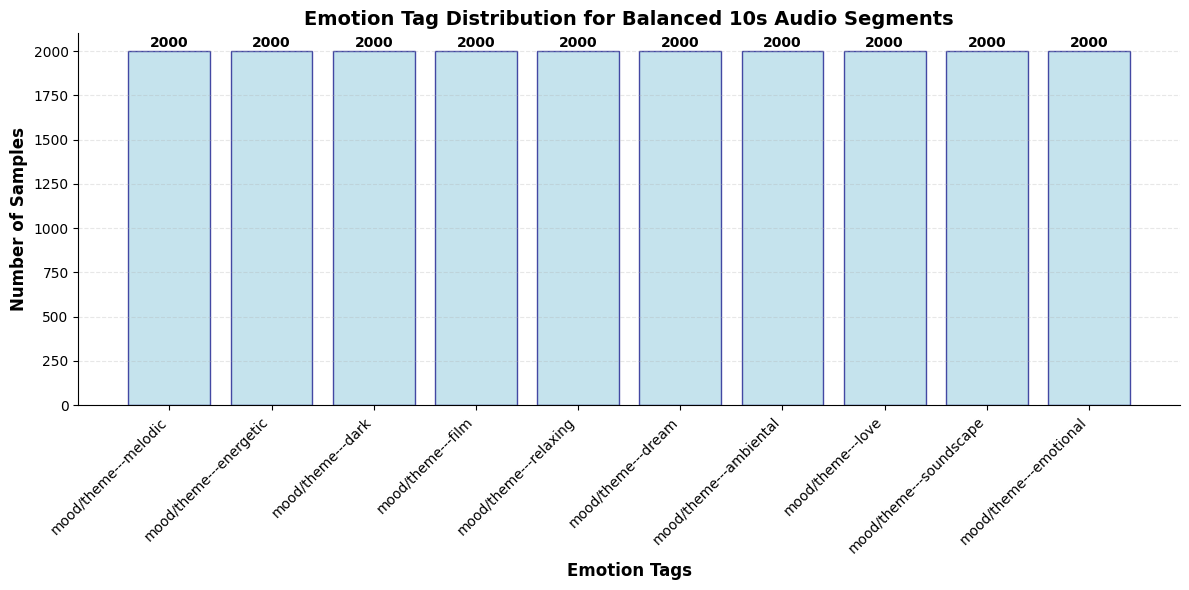


📊 Statistics saved to: C:\Users\14217\Desktop\DT2470\Predictions with sound classifier\metadata_balanced_10s_multi_tag_stats.txt

Additional Analysis
Average samples per class: 2000.0
Max samples in a class: 2000
Min samples in a class: 2000
Balance ratio (min/max): 1.00


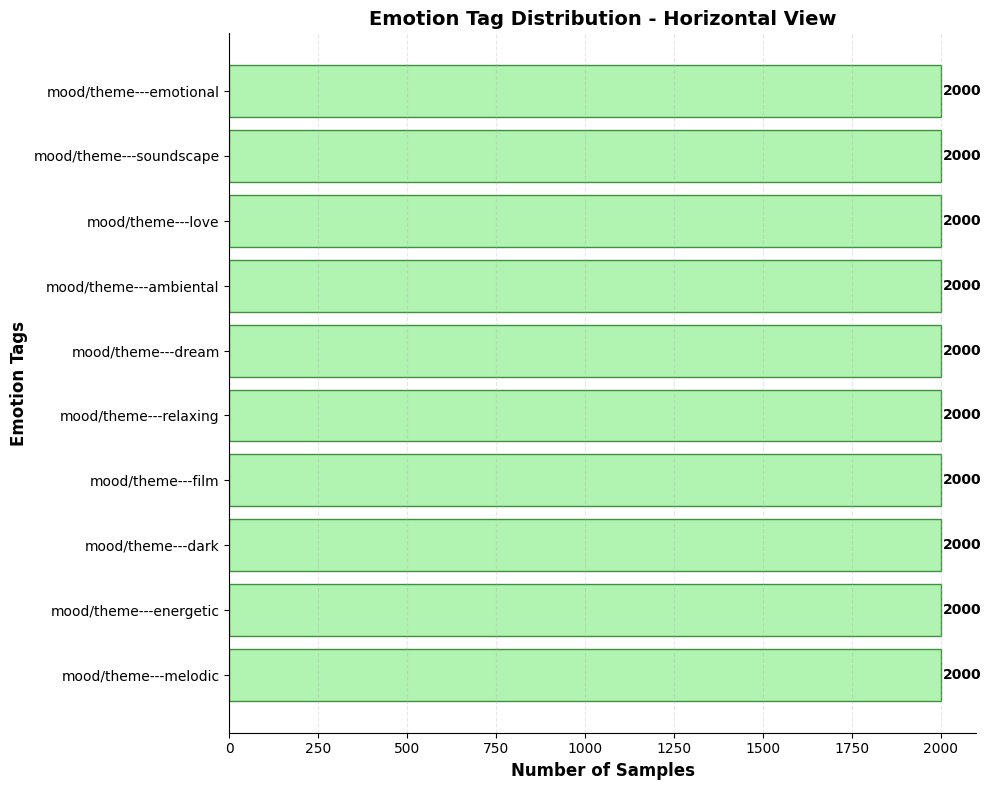

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def analyze_generated_tags(metadata_file):
    """
    Analyze tag distribution after preprocess_audio_to_10s_multisegment
    """
    # Read the generated metadata
    metadata = pd.read_csv(metadata_file, sep='\t')

    # Check if TAG column exists
    if 'TAG' not in metadata.columns:
        raise ValueError("❌ 'TAG' column not found, please check the metadata file.")

    # Count each tag
    tag_counts = Counter(metadata['TAG'])
    sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

    print("=" * 60)
    print("🎧 Generated Data Emotion Tag Statistics")
    print("=" * 60)
    print(f"Total samples: {len(metadata)}")
    print(f"Number of classes: {len(sorted_tags)}\n")
    print("Tag distribution:")
    print("-" * 40)
    for i, (tag, count) in enumerate(sorted_tags, 1):
        print(f"{i:2d}. {tag:<15}: {count:>5} samples")

    # Plot tag distribution
    tags, counts = zip(*sorted_tags)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(tags, counts, color='lightblue', edgecolor='navy', alpha=0.7)
    plt.title("Emotion Tag Distribution for Balanced 10s Audio Segments", fontsize=14, fontweight='bold')
    plt.xlabel("Emotion Tags", fontsize=12, fontweight='bold')
    plt.ylabel("Number of Samples", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on bars
    for i, (bar, count) in enumerate(zip(bars, counts)):
        plt.text(bar.get_x() + bar.get_width()/2., count + 5, 
                str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Add grid and styling
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

    # Save to file
    out_file = metadata_file.replace('.tsv', '_tag_stats.txt')
    with open(out_file, 'w', encoding='utf-8') as f:
        f.write("Generated Data Emotion Tag Statistics\n")
        f.write("=" * 50 + "\n")
        f.write(f"Total samples: {len(metadata)}\n")
        f.write(f"Number of classes: {len(sorted_tags)}\n\n")
        f.write("Tag Distribution:\n")
        f.write("-" * 30 + "\n")
        for tag, count in sorted_tags:
            f.write(f"{tag:<15}: {count:>5}\n")

    print(f"\n📊 Statistics saved to: {out_file}")
    
    return sorted_tags, metadata

def plot_comparison_horizontal(sorted_tags):
    """
    Alternative horizontal bar chart for better readability
    """
    tags, counts = zip(*sorted_tags)
    
    plt.figure(figsize=(10, 8))
    y_pos = range(len(tags))
    bars = plt.barh(y_pos, counts, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
    
    plt.xlabel("Number of Samples", fontsize=12, fontweight='bold')
    plt.ylabel("Emotion Tags", fontsize=12, fontweight='bold')
    plt.title("Emotion Tag Distribution - Horizontal View", fontsize=14, fontweight='bold')
    plt.yticks(y_pos, tags)
    
    # Add value labels
    for i, (bar, count) in enumerate(zip(bars, counts)):
        plt.text(count + 5, bar.get_y() + bar.get_height()/2.,
                str(count), ha='left', va='center', fontsize=10, fontweight='bold')
    
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    metadata_file = r"C:\Users\14217\Desktop\DT2470\Predictions with sound classifier\metadata_balanced_10s_multi.tsv"
    
    try:
        sorted_tags, metadata = analyze_generated_tags(metadata_file)
        
        # Generate additional visualization
        print("\n" + "=" * 60)
        print("Additional Analysis")
        print("=" * 60)
        
        # Show balance statistics
        counts = [count for tag, count in sorted_tags]
        avg_count = sum(counts) / len(counts)
        max_count = max(counts)
        min_count = min(counts)
        
        print(f"Average samples per class: {avg_count:.1f}")
        print(f"Max samples in a class: {max_count}")
        print(f"Min samples in a class: {min_count}")
        print(f"Balance ratio (min/max): {min_count/max_count:.2f}")
        
        # Plot horizontal version if there are many tags
        if len(sorted_tags) > 8:
            plot_comparison_horizontal(sorted_tags)
            
    except Exception as e:
        print(f"Error: {e}")